In [10]:
import numpy as np
from sympy import diff , log , exp
from sympy.abc import x
import pandas as pd

In [11]:
df = pd.read_csv('RidingMowers.csv')
df

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought
...,...,...,...
175,86,121,Bought
176,87,109,Bought
177,88,119,Bought
178,89,110,Bought


In [12]:
df['Response'].replace({'Not Bought':0,'Bought' :1},inplace=True)
df.head()

,Income,Lot_Size,Response
0,34,26,0
1,34,40,0
2,34,46,0
3,34,48,0
4,34,53,0


In [13]:
x1 = df['Income']
x2 = df['Lot_Size']
y = df['Response']


In [14]:
x1 = ((x1-np.min(x1))/(np.max(x1)-np.min(x1)))
x2 = ((x2-np.min(x2))/(np.max(x2)-np.min(x2)))
yi = ((y-np.min(y))/(np.max(y)-np.min(y)))


In [15]:
import numpy as np 
def sig(x):
    return 1/(1 + np.exp(-x))


In [16]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt


In [17]:
eta = 0.4
b0 = .8
w1 = -0.6
w2 = 0.1
nobs = df.shape[0]
ycap = sig(x1*w1 + x2*w2 + b0)
overall = []

for i in range(1,101):

    db = -(1/nobs)*np.sum((yi-ycap))     
    dw1 = -(1/nobs)*np.sum((yi-ycap)*x1)  
    dw2 = -(1/nobs)*np.sum((yi-ycap)*x2)  
        
    new_b = b0 - eta*db
    new_w1 = w1 - eta*dw1
    new_w2 = w2 - eta*dw2

    b0 = new_b
    w1 = new_w1
    w2 = new_w2
    ycap = sig(x1*w1 + x2*w2 + b0)
    
    # print('L = ', (1/(2*nobs)*np.sum((yi-ycap)**2)))
    print(" L = " , (-1/nobs)*np.sum((yi*np.log(ycap+np.finfo(float).eps)+(1-yi)*np.log(1-ycap))))
    print(" Log_Loss = ", log_loss(y,ycap))
    # print('w = ',w0,'; b =', b0)
    print(f" w1 = {w1} ; w2 = {w2} ; b0 = {b0}")
    overall.append(log_loss(y,ycap))

 L =  0.8303597183343613
 Log_Loss =  0.8303597183343614
 w1 = -0.5911445854374057 ; w2 = 0.09901693443675591 ; b0 = 0.7059878536997513
 L =  0.8123365936824956
 Log_Loss =  0.8123365936824957
 w1 = -0.578539943752324 ; w2 = 0.10202841432050429 ; b0 = 0.6203577418478959
 L =  0.7968699061696102
 Log_Loss =  0.7968699061696103
 w1 = -0.5626954953610338 ; w2 = 0.10850809623649099 ; b0 = 0.5421487893771318
 L =  0.7833590262606047
 Log_Loss =  0.7833590262606048
 w1 = -0.5440802348852327 ; w2 = 0.11796943198388007 ; b0 = 0.4704641147098071
 L =  0.7713436733504139
 Log_Loss =  0.7713436733504141
 w1 = -0.5231158499085304 ; w2 = 0.12997344486912066 ; b0 = 0.40448737164905646
 L =  0.7604755230983918
 Log_Loss =  0.760475523098392
 w1 = -0.5001753216326273 ; w2 = 0.14413071230215832 ; b0 = 0.3434885207757477
 L =  0.7504932546886235
 Log_Loss =  0.7504932546886238
 w1 = -0.47558480160631667 ; w2 = 0.16009982875360798 ; b0 = 0.28682278852716475
 L =  0.7412019482661852
 Log_Loss =  0.7412019

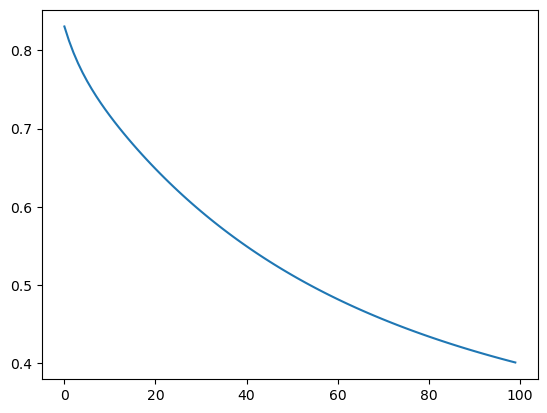

In [18]:
plt.plot(overall)